In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
% cd /content/gdrive
! ls

/content/gdrive
MyDrive


In [4]:
% cd MyDrive/Data

/content/gdrive/MyDrive/Data


In [5]:
! ls


house_price_prediction.csv  housePricePrediction.csv


In [6]:

dataset = pd.read_csv("/content/gdrive/MyDrive/Data/house_price_prediction.csv")

In [7]:
dataset.head()

,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price,address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
dataset.shape

(5012, 7)

In [9]:
dataset.describe()

,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price
count,5009.000000,5010.000000,5011.000000,5012.000000,5009.000000,5.012000e+03
mean,68577.804938,5.977508,6.987906,3.982095,36155.832559,1.231947e+06
std,10661.033166,0.991472,1.006453,1.233945,9928.823462,3.529525e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61482.244790,5.322274,6.298437,3.140000,29403.512060,9.981375e+05
50%,68814.925610,5.969828,7.003188,4.050000,36183.287800,1.232983e+06
75%,75780.621120,6.652302,7.667048,4.490000,42841.741620,1.471756e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [10]:
dataset.isnull().any()

avg_income             True
avg_area_house_age     True
avg_area_num_rooms     True
avg_bedrooms          False
avg_population         True
price                 False
address                True
dtype: bool

In [11]:
dataset = dataset.fillna(method="ffill")

In [12]:
dataset.isnull().any()

avg_income            False
avg_area_house_age    False
avg_area_num_rooms    False
avg_bedrooms          False
avg_population        False
price                 False
address               False
dtype: bool

In [13]:
X = dataset[["avg_area_house_age"]].values
y = dataset[["price"]].values

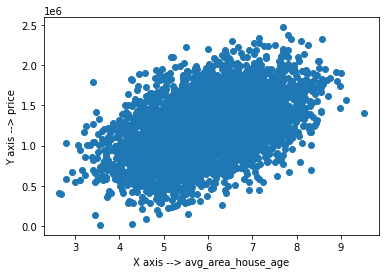

In [22]:
plt.xlabel("X axis --> avg_area_house_age")
plt.ylabel("Y axis --> price")
plt.scatter(X,y)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = model.predict(X_test)

In [20]:
accuracy = model.score(X_test,y_test)


In [21]:
print("Model accuracy: ", accuracy * 100, "%")

Model accuracy:  22.467064492945976 %


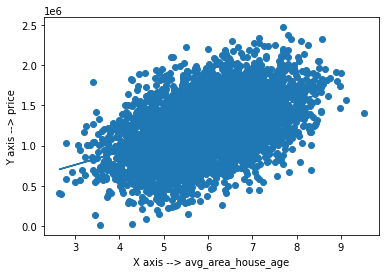

In [23]:
plt.xlabel("X axis --> avg_area_house_age")
plt.ylabel("Y axis --> price")
plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.show()

In [24]:
model.predict([[3.5]])

array([[842336.65699485]])

In [26]:
model.predict([[8.9]])

array([[1697934.67944694]])

In [32]:
y_test

array([[1216888.02  ],
       [ 975385.5554],
       [ 875799.2473],
       ...,
       [1028964.474 ],
       [1212939.954 ],
       [1006580.48  ]])

In [33]:
y_pred

array([[1011101.63877396],
       [1136854.0012048 ],
       [ 943680.73262379],
       ...,
       [1222593.99318576],
       [1056317.3682084 ],
       [1251412.09937566]])

In [31]:
error = mean_squared_error(y_test,y_pred)

print(error)

97024662120.1522
